<div style="border:solid Chocolate 2px; padding: 40px">
<b>Привет, Максим!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом!
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 Очень постараюсь сделать это как можно быстрее :) В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии расскрашены разными цветами: 
<br/>
<div class="alert alert-success">
<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным, или если я посчитаю нужным тебя за что-то похвалить. На такие решения можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-block alert-danger">
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

<div class="alert alert-info">

Привет, Юлия! 
    
Спасибо тебе за проделанную работу! Очень ценными для меня оказались ссылки на статьи и пояснения по поводу повторов индексов. Очень удачное объяснение!

P.S.: не знаю, так задумано или случайно получилось, но когда перезагружаешь ядро, переносит на последнюю ячейку тетради, а там видишь этого котика, из-за которого не можешь не улыбнуться😊. Спасибо за приятную эмоцию!

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b> Рада, что тебе понравилось, и было полезно! Скорее всего случайно, но вышло, видимо, как раз кстати 😊

# Выбор локации для скважины

**Цель:**

По данным геологической разведки, содержащим информацию о качестве нефти каждой исследованной точки в трех разных регионах, необходимо выбрать прибыльную скважину для ее дальнейшей разработки. Для реализации задачи построим модель, предсказывающую запасы нефти. На основе прогнозных значений выберем месторождения с наиболее высокими предсказаниями.

Обладая реальными данными о запасах месторождений, можно оценить прибыльность скважин в каждом регионе.
Кроме прибыльности оценим риски понести убытки. На основании этого надо выделить наиболее оптимальные для разработки регионы.


Данные геологоразведки трёх регионов находятся в файлах:

- `/datasets/geo_data_0.csv`,
- `/datasets/geo_data_1.csv`,
- `/datasets/geo_data_2.csv`.

Описание данных:

- *id* — уникальный идентификатор скважины;
- *f0, f1, f2* — три признака точек (неважно, что они означают, но сами признаки значимы);
- *product* — объём запасов в скважине (тыс. баррелей).

**План исследования:**

1. Загрузка, подготовка и исследование данных.
2. Обучение модели.
3. Расчет прибыли и рисков.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Очень хорошо, что оставляешь в начале проекта его описание! Любой, кто захочет взглянуть на работу, сможет сразу погрузиться в суть задачи. Будет немного лучше, если ты его чуть-чуть перефрзируешь, изложишь задачу своими словами, продумаешь план действий, так работа станет похожа на настоящий исследовательский проект, а не выполненное домашнее задание :)

<div class="alert alert-info">
    
Обычно так всегда и делаю. В этот раз смутило наличие вступления в самом файле 😊.

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b> 😉

**Импорт библиотек:**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import seaborn as sns

! pip install phik -q
import phik

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  ( 
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

import numpy as np

## Загрузка и подготовка данных

### Загрузка и предпросмотр

In [2]:
# функция для записи файла в датафрейм
def read_data(f_path, link, separator, decimal='.'):

    try:
        data = pd.read_csv(f_path, sep=separator, decimal=decimal)
    except:
        data = pd.read_csv(link, sep=separator, decimal=decimal)

    return data

Считаем все наши таблицы в датафреймы:

In [3]:
region_1 = read_data('/datasets/geo_data_0.csv', 'https://code.s3.yandex.net/datasets/geo_data_0.csv', ',')
region_2 = read_data('/datasets/geo_data_1.csv', 'https://code.s3.yandex.net/datasets/geo_data_1.csv', ',')
region_3 = read_data('/datasets/geo_data_2.csv', 'https://code.s3.yandex.net/datasets/geo_data_2.csv', ',')

Вспомогательная функция для предпросмотра:


In [4]:
# функция для ознакомления с таблицами
def observe_data(df):
    print('Превью таблицы (первые пять строк):\n')
    display(df.head())
    print('=' * 90)
    print('Информация о столбцах и типах данных:\n')
    df.info()
    print('=' * 90)
    print('Статистическая информация:\n')
    display(df.describe().T)

In [5]:
observe_data(region_1)

Превью таблицы (первые пять строк):



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Информация о столбцах и типах данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Статистическая информация:



,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [6]:
observe_data(region_2)

Превью таблицы (первые пять строк):



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Информация о столбцах и типах данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Статистическая информация:



,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [7]:
observe_data(region_3)

Превью таблицы (первые пять строк):



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Информация о столбцах и типах данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Статистическая информация:



,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Каждая таблица содержит информацию о 100 тыс. точек. Каждая точка это отдельное наблюдение. Характеристика точки(месторождения) включает в себя условные признаки *f0*, *f1*, *f2* и запасы нефти *product*. Все признаки представляют собой дробные числа. Кроме этого каждое месторождение обладает строковым идентификатором.

Проблем с таблицами на предпросмотре не выявлено.

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Супер, с данными чуть познакомились, можем двигаться дальше!

### Предобработка данных

Строковый объект в наших таблицах только один, поэтому проверим на наличие дубликатов только столбец *id*:

In [8]:
len(region_1['id'].unique())

99990

In [9]:
region_1.shape

(100000, 5)

Видим, что в первой таблице есть повторяющиеся номера, посмотрим строки:

In [10]:
region_1.loc[region_1.duplicated('id', keep=False)]

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


Абсолютно нормальные значения, но *id* номера повторяться не могут, т.к. характеризуют разные месторождения. Вероятно возникла ошибка при формировании *id*. Чтобы в будущем не возникла путаница с идентификацией, переименуем дубли. Т.к. названия сгенирированы автоматически, чтобы не повторить номер, просто добавим порядковый номер к названию.

In [11]:
added_number = 0
for idx in region_1.loc[region_1.duplicated('id')].index:

    region_1.loc[region_1.index == idx, 'id'] = region_1.loc[region_1.index == idx, 'id'] + str(added_number)
    added_number += 1

In [12]:
len(region_1['id'].unique())

100000

Теперь все *id* уникальны. Аналогично поступим с оставшимися таблицами:

In [13]:
len(region_2['id'].unique())

99996

In [14]:
len(region_3['id'].unique())

99996

In [15]:
added_number = 0
for idx in region_2.loc[region_2.duplicated('id')].index:

    region_2.loc[region_2.index == idx, 'id'] = region_2.loc[region_2.index == idx, 'id'] + str(added_number)
    added_number += 1

In [16]:
added_number = 0
for idx in region_3.loc[region_3.duplicated('id')].index:

    region_3.loc[region_3.index == idx, 'id'] = region_3.loc[region_3.index == idx, 'id'] + str(added_number)
    added_number += 1

In [17]:
len(region_2['id'].unique())

100000

In [18]:
len(region_3['id'].unique())

100000

В ходе предобработки обнаружили дублирование в столбце *id*. Решили проблему переименованием. Других проблем данные не имеют и готовы к исследовательскому анализу.


<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Здорово, что ты внимательно относишься к данным и заметил повторения в id! Поскольку данные синтетические, а значения в остальных столбцах разные, это, действительно, вполне можно списать на ошибку генерации данных и скорректировать. Для реальных же данных это было бы неприменимо. В случае реальных данных было бы уместнее их удалить (для нас это позволительно, благо их не много), либо оставлять средни наблюдений то, у которого значение продукта меньше, чтобы точно не занижать риски, а наоборот даже завысить, условный штраф за сомнительность данных :) 

### Исследовательский анализ данных

Таблицы имеют одинаковую структуру, все признаки, включая целевой - количественные. Можно сопоставить распределения значений на одном графике: 

In [19]:
def make_histogramm(ax, df, column, order):
    
    ax.hist(x=df[column], bins=30, edgecolor='black')
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    ax.set_title(f'Гистограмма распределения региона {order}')
    ax.set_xlabel('Значение признака')
    ax.set_ylabel('Количество наблюдений')

In [20]:
def make_boxplot(ax, df, column, order):
    
    ax.boxplot(df[column], vert=False)
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    ax.set_title(f'Диаграмма размаха региона {order}')
    ax.set_xlabel('Значение признака')

In [21]:
df_list = [region_1, region_2, region_3]

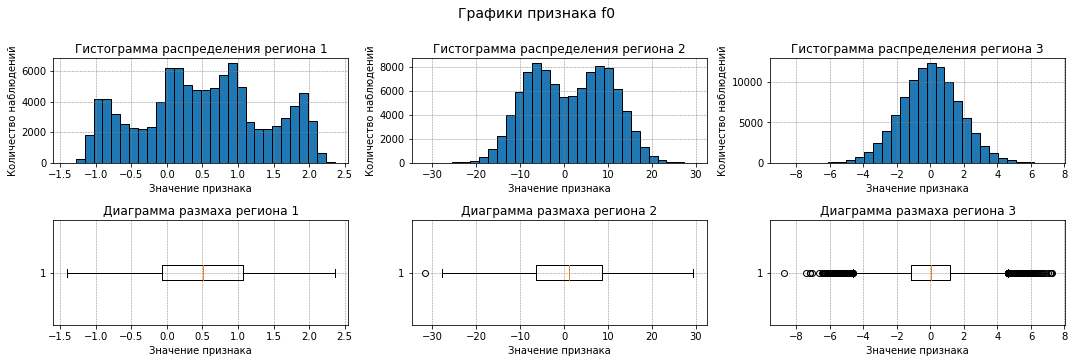

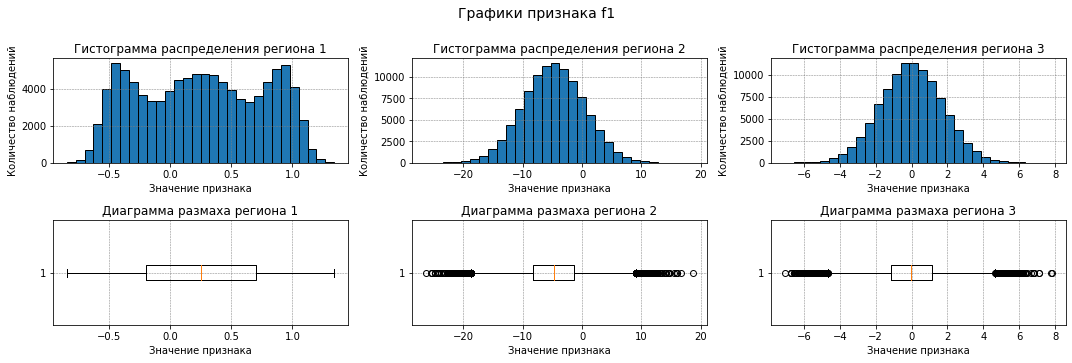

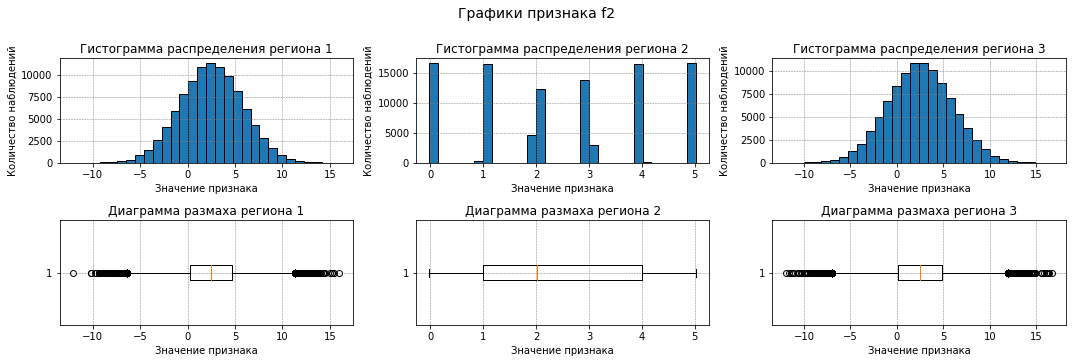

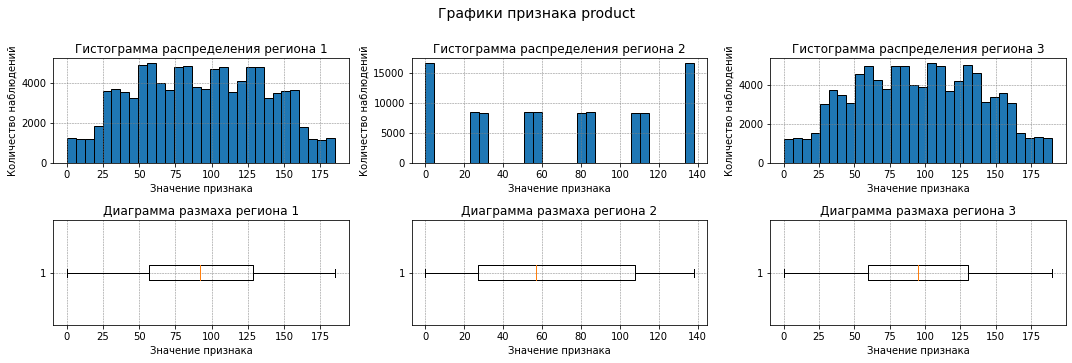

In [22]:
for column in region_1.drop('id', axis=1).columns:
    fig = plt.figure(figsize=(15, 5))
    gs = GridSpec(nrows=2, ncols=3, figure=fig)
    plt.suptitle(f'Графики признака {column}', va='center', fontsize=14)
    
    for i, df in enumerate(df_list):
        
        ax = fig.add_subplot(gs[0,i])
        make_histogramm(ax, df, column, i+1)
        ax = fig.add_subplot(gs[1,i])
        make_boxplot(ax, df, column, i+1)

    plt.tight_layout()
    plt.show()

+ По первому признаку *f0* выделим, что нормально распределено только в третьем регионе, но на диаграмме размаха фиксируем много выбросов. Остальные регионы имеют бимодальное распределение (2 регион) и полимодальное (1 регион).
+ Признак *f1* распределен нормально во втором и третьем регионах, но с большим числом выбросов. В первом регионе распределение полимодальное.
+ Признак *f2* имеет нормальное распределение в первом и третьем регионах с выбросами на диаграмме размаха. Во втором регионе видим кластеризацию признака.
+ По общим запасам нефти в месторождениях можно сказать, что в среднем месторождения с наибольшими запасами находятся в третьем регионе. В первом и третьем достаточно большая вариативность распределния признака, наблюдаем несколько мод. Во втором регионе видим сильную кластеризацию: признак сконцентрирован около значений: 0, 25, 55, 85, 110, 135, причем больше всего наблюдений на крайних значениях диапазона.

Теперь взглянем на связь между признаками с помощью графиков рассеивания:

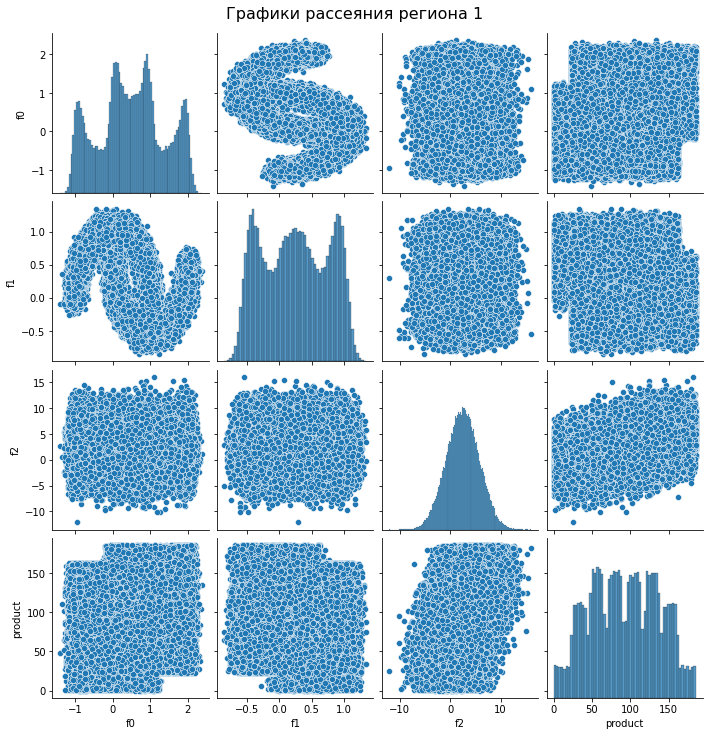

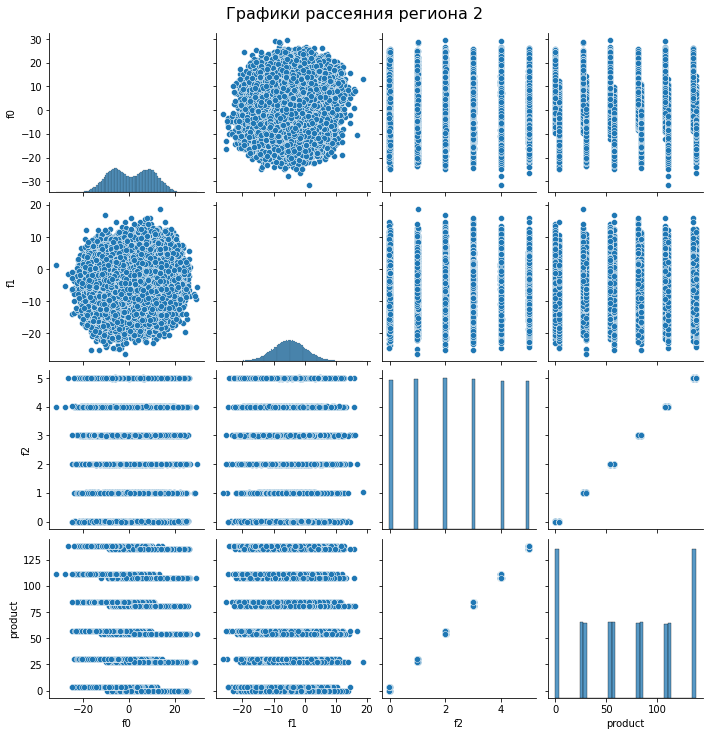

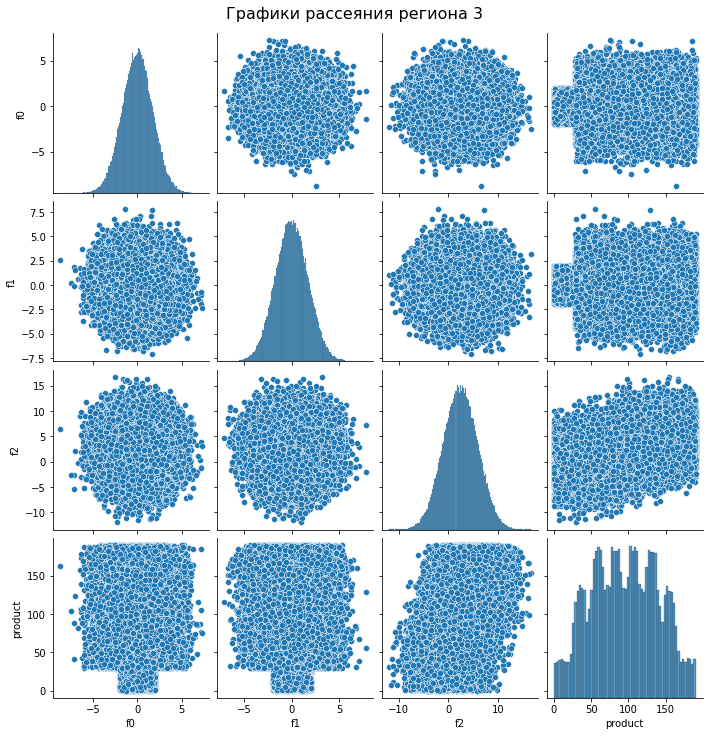

In [23]:
for num, df in enumerate(df_list):
    sns.pairplot(df, vars=df.drop('id', axis=1))
    plt.suptitle(f'Графики рассеяния региона {num+1}', y=1.02, fontsize=16)
    plt.show()

В данной задаче целевым признаком является *product*, посмотрим на связи между входными и целевым признаком в разных регионах:
+ **Регион 1**: целевой признак линейно связан только с f2, остальные признаки между собой имеют нелинейные связи.
+ **Регион 2**: также отметим выраженную линейную связь между целевым и признаком f2, остальные признаки имеют кластеризацию или квадратичную взаимосвязь.
+ **Регион 3**: аналогично остальным - линейно связаны целевой признак и f2, остальные - нелинейно.

На основании данных выводов и наличия выбросов будем вычислять коэффициенты корреляции с помощью подхода Phik.

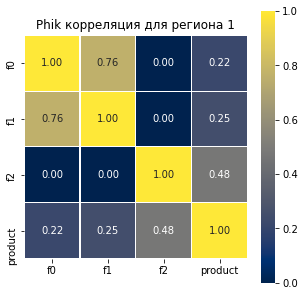

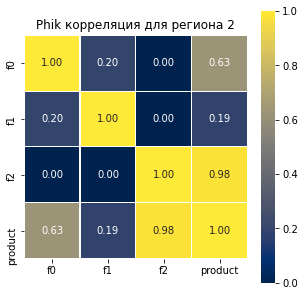

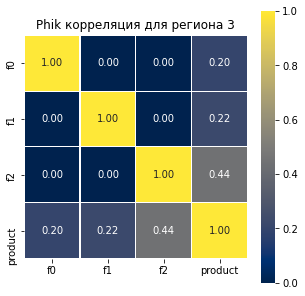

In [24]:
# визуализация коэффициентов корреляции
for num, df in enumerate(df_list):
    figsize = (5, 5)
    fig = plt.subplots(figsize=figsize)
    plt.title(f'Phik корреляция для региона {num+1}')
    sns.heatmap(df
                .drop('id', axis=1)
                .phik_matrix(interval_cols=df.drop('id', axis=1).columns), 
                annot=True, cmap='cividis', 
                linewidth=0.1,
                fmt='.2f',
                square=True)
    plt.show()

Согласно корреляционному анализу в регионах 1 и 3 не установлены признаки с высокой корреляцией. Однако в регионе 2 мы видим, что сила связи между таргетом и *f2* достаточно высока (корреляция 0.98). Ранее мы это заметили и на диаграмме рассеивания. Сам признак отличается от такого же признака в других регионах необычным распределением, значения которого находятся в определенных диапозонах, когда как в остальных регионах этот признак распределен нормально и имеет больший размах.

**Вывод:**

Предоставленные данные мы загрузили и сделали анализ. Каждый полученный датафрейм представляет информацию об одном регионе. Все таблицы имеют одинаковую структуру и состоят из таргета *product* и количественных входных признаков *f0, f1, f2*.

В исходных данных были найдены дублирующие id, которые мы переименовали.

Исследовательский анализ выявил:
+ не все признаки распределены нормально;
+ некоторые имеют выбросы;
+ сильная кластеризация признака *f2* второго региона;
+ целевой признак имеет выраженную линейную связь только с признаком *f2*;
+ причем эта линейная связь имеет большую силу согласно коэффициенту корреляции между рассматриваемыми признаками (0.98);
+ остальные признаки не имеют сильной корреляции.

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Отличная работа!

## Обучение и проверка модели

### Подготовка PipeLine

Т.к. у нас несколько идентичных таблиц, воспользуемся PipeLine для автоматической подготовки данных и создания регрессионой модели.

In [25]:
RANDOM_STATE = 13

Столбцы для всех таблиц буду одинаковые:

In [26]:
num_columns = region_1.drop(['id', 'product'], axis=1).columns

Разобьем данные для первого региона:

In [27]:
X = region_1.drop(['product'], axis=1)
y = region_1['product']

X_train, X_test_reg1, y_train, y_test_reg1 = train_test_split(
X, 
y, 
random_state=RANDOM_STATE
)

Признаки все количественные, поэтому будем преобразовывать данные в один этап - масштабирование:

In [28]:
data_preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [29]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', LinearRegression())
    ]
)

Кроме классической модели LinearRegression, попробуем Ridge и Lasso с разными значениями силы регуляции alpha и разными подходами маштабирования:

In [30]:
param_grid = [
    {
        'model': [LinearRegression()],
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough'
        ],
    },
    
    {
        'model': [Ridge()],
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough'
        ],
        'model__alpha': [0.1, 1, 10, 100]
    },
    
    {
        'model': [Lasso()],
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough'
        ],
        'model__alpha': [0.1, 1, 10, 100]
    }
    
]

Переберем все возможные комбинации, в качестве метрики выберем RMSE:

In [31]:
best_model_reg1 = GridSearchCV(
    pipe_final,
    param_grid=param_grid, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
)

best_model_reg1.fit(X_train.drop('id', axis=1), y_train)
print('Лучшая модель и её параметры:\n\n', best_model_reg1.best_estimator_)
print('Метрика RMSE для лучшей модели:\n', best_model_reg1.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['f0', 'f1', 'f2'], dtype='object'))])),
                ('model', Ridge(alpha=1))])
Метрика RMSE для лучшей модели:
 -37.694000006783696


Самой лучшей оказалась модель Ridge с дефолтным alpha = 1 и подготовкой данных с помощью MinMaxScaler. Посмотрим, как проявили себя другие модели:

In [32]:
# установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)

In [33]:
result_reg1 = pd.DataFrame(best_model_reg1.cv_results_).sort_values('rank_test_score')
result_reg1[['rank_test_score', 'param_model', 'mean_test_score','params']].head(15)

,rank_test_score,param_model,mean_test_score,params
9,1,Ridge(alpha=1),-37.694000,"{'model': Ridge(alpha=1), 'model__alpha': 1, 'preprocessor__num': MinMaxScaler()}"
5,2,Ridge(alpha=1),-37.694004,"{'model': Ridge(alpha=1), 'model__alpha': 0.1, 'preprocessor__num': MinMaxScaler()}"
14,3,Ridge(alpha=1),-37.694005,"{'model': Ridge(alpha=1), 'model__alpha': 10, 'preprocessor__num': RobustScaler()}"
15,4,Ridge(alpha=1),-37.694005,"{'model': Ridge(alpha=1), 'model__alpha': 10, 'preprocessor__num': 'passthrough'}"
12,5,Ridge(alpha=1),-37.694005,"{'model': Ridge(alpha=1), 'model__alpha': 10, 'preprocessor__num': StandardScaler()}"
10,6,Ridge(alpha=1),-37.694006,"{'model': Ridge(alpha=1), 'model__alpha': 1, 'preprocessor__num': RobustScaler()}"
11,7,Ridge(alpha=1),-37.694006,"{'model': Ridge(alpha=1), 'model__alpha': 1, 'preprocessor__num': 'passthrough'}"
8,8,Ridge(alpha=1),-37.694006,"{'model': Ridge(alpha=1), 'model__alpha': 1, 'preprocessor__num': StandardScaler()}"
6,9,Ridge(alpha=1),-37.694006,"{'model': Ridge(alpha=1), 'model__alpha': 0.1, 'preprocessor__num': RobustScaler()}"
7,10,Ridge(alpha=1),-37.694006,"{'model': Ridge(alpha=1), 'model__alpha': 0.1, 'preprocessor__num': 'passthrough'}"


Можем заметить, что в пределе топ-15 модель и гиперпараметры практически не имеют влияние на результат. Т.е. нам подойдет как Ridge так LinearModel. 

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 
    
Регуляризация себя никак не проявила, поскольку у нас всего три признака, при этом между ними не наблюдается линейной взаимосвязи, то есть в понижении размерности нет необходимости.  
    
    
Относительно масштабирования. На самом деле на деревянных моделях и на **простой** линейной регрессии (ридж и лассо к ним не относятся) масштабирование не окажет никакого влияния на предсказания (причем масштабирование любого типа). У моделей на основе деревьв принцип принятия решения завязан на относительности значений признаков (больше/меньше), а она при стандартизации воздействию не подвергается. С линейными регрессиями чуть интереснее: стандартизация, к примеру, никак себя не проявит, поскольку все изменения переменной уйдут в новые коэффициенты:

<details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

$y = \alpha + \beta x$ - без стандартизации и масштабирования
_____________________________________________________________________________________________________________________

$y = \alpha_{st} + \beta_{st} \frac{x-mean}{std} = (\alpha_{st} - \frac{\beta_{st}mean}{std}) + (\frac{\beta_{st}}{std}) x$ - со стандартизацией

При этом $\alpha = (\alpha_{st} - \frac{\beta_{st}mean}{std})$ и $\beta = (\frac{\beta_{st}}{std})$
_____________________________________________________________________________________________________________________

$y = \alpha_{mm} + \beta_{mm} \frac{x-min}{max-min} = (\alpha_{mm} - \frac{\beta_{mm}min}{max-min}) + (\frac{\beta_{mm}}{max-min}) x$ - с масштабированием

При этом $\alpha = (\alpha_{mm} - \frac{\beta_{mm}min}{max-min})$ и $\beta = (\frac{\beta_{mm}}{max-min})$
_____________________________________________________________________________________________________________________

По ссылкам можно узнать, когда все-таки стандартизация крайне важна: <a href = 'https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html'>тык</a>, <a href = 'https://www.statlect.com/fundamentals-of-statistics/linear-regression-with-standardized-variables'>тык</a>.

Одно из преимуществ стандартизации для линейной регрессии: мы можем по величине полученных коэффициентов судить о важности соотвествующих признаков (больше коэффициент - больше значимость). Без стандартизации такая интерпретация невозможна, так как каждый коэффициент в себя включает еще и элемент масштаба своего признака. Второй случай, когда стандартизация необходима - как раз линейные регрессии с **регуляризацией** (ридж, лассо, эластик нет), поскольку данные модели регулируют те самые коэффициенты, на которые воздействует стандартизация. Ну и на всякий случай отмечу, что из-за особенностей формата float в некоторых знаках после запятой отличия все-таки могут быть, что может оказаться критичным, например, на соревнованиях.

</details>

<div class="alert alert-info">
    
Спасибо, отличные статьи!

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b> 😉

Если нет существенной разницы между моделями и способом подготовки данных, выберем вариант, который базово указан в *pipe_final*: модель - LinearRegression, стандартизация с помощью StandartScale:

In [34]:
pipe_final.fit(X_train.drop('id', axis=1), y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['f0', 'f1', 'f2'], dtype='object'))])),
                ('model', LinearRegression())])

Получим предсказанные данные и оценим различными метриками:

In [35]:
# получение предсказаний
predictions_reg1 = pipe_final.predict(X_test_reg1.drop('id', axis=1))

# рассчет метрик
print('Основные метрики модели:')

r2_reg1 = r2_score(y_test_reg1, predictions_reg1)
print("R2 LinearRegression =", r2_reg1)

mse_reg1 = mean_squared_error(y_test_reg1, predictions_reg1)
print("MSE =", mse_reg1)

rmse_reg1 = mse_reg1 ** 0.5
print("RMSE =", rmse_reg1)

mae_reg1 = mean_absolute_error(y_test_reg1, predictions_reg1)
print("MAE =", mae_reg1)

Основные метрики модели:
R2 LinearRegression = 0.2748211315201472
MSE = 1420.8789002297854
RMSE = 37.69454735409069
MAE = 31.008550751783346


Метрика R2 говорит о том, что в 27% случаев предсказание модели точнее, чем среднее значение целевого признака. MAE нам говорит, что в среднем предсказания отклоняются на 31, при среднем значении таргета 92.5.

Проанализируем ошибки, совершаемые моделью, для этого создадим вспомогательную функцию:

In [36]:
def analyze_residuals(y_test, predictions):
    
    ''' Функция строит гистограмму распределения остатков и график распределения остатков.
        На входе принимает тестовый и расчетный целевой показатели.'''
    print('Анализ остатков')
    print('=' * 80)
    residuals = y_test - predictions

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].hist(residuals)
    axes[0].grid(True)
    axes[0].set_title('Гистограмма распределения остатков', fontsize=16)
    axes[0].set_xlabel('Остатки')
    axes[0].set_ylabel('Количество наблюдений')

    axes[1].scatter(y=residuals, x=predictions)
    axes[1].grid(True)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии', fontsize=16)
    
    plt.tight_layout()
    plt.show()

Анализ остатков


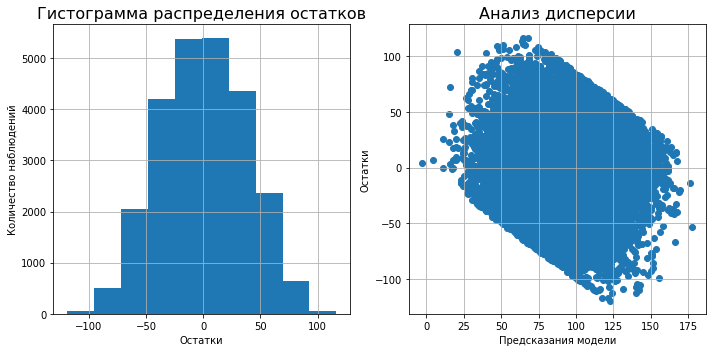

In [37]:
# анализ остатков
analyze_residuals(y_test_reg1, predictions_reg1)

Видим, что ошибки распределены нормально и симметрично. Характерный ромб в дисперсии остатков указывает на то, что модель не до конца улавливает связи. Отметим, что пик положительных ошибок находится в диопазоне 50-75 предсказанного значения *product*, т.е. таргет максимально занижен. Пик отрицательных - 100-125, таргет здесь максимально завышен в некоторых случаях. 

In [38]:
mean_product_reg1 = predictions_reg1.mean()

Аналогично получим предсказания для второго региона:


In [39]:
X = region_2.drop(['product'], axis=1)
y = region_2['product']

X_train, X_test_reg2, y_train, y_test_reg2 = train_test_split(
X, 
y, 
random_state=RANDOM_STATE
)

pipe_final.fit(X_train.drop('id', axis=1), y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['f0', 'f1', 'f2'], dtype='object'))])),
                ('model', LinearRegression())])

Основные метрики модели:
R2 LinearRegression = 0.9996233207312256
MSE = 0.7988722588308341
RMSE = 0.8937965421900188
MAE = 0.7199001055406401
Анализ остатков


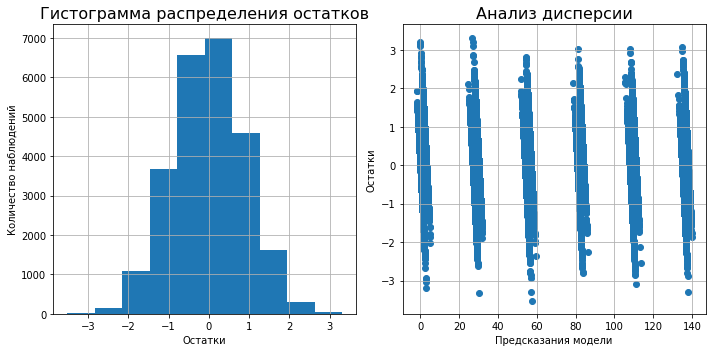

In [40]:
predictions_reg2 = pipe_final.predict(X_test_reg2.drop('id', axis=1))

# рассчет метрик
print('Основные метрики модели:')

r2_reg2 = r2_score(y_test_reg2, predictions_reg2)
print("R2 LinearRegression =", r2_reg2)

mse_reg2 = mean_squared_error(y_test_reg2, predictions_reg2)
print("MSE =", mse_reg2)

rmse_reg2 = mse_reg2 ** 0.5
print("RMSE =", rmse_reg2)

mae_reg2 = mean_absolute_error(y_test_reg2, predictions_reg2)
print("MAE =", mae_reg2)

# анализ остатков
analyze_residuals(y_test_reg2, predictions_reg2)

Обученная модель на данных второго региона, напротив, показывает отличные результаты на валидации: R2 указывает на почти идеально верные предсказания, остальные метрики говорят, что модель отклоняется не больше чем на 1 в своих предсказаниях.

Остатки распределны симметрично и нормально. В дисперсии видим кластеризацию благодаря признаку *f2*, который имеет самый большой вес в предсказании.

In [41]:
mean_product_reg2 = predictions_reg2.mean()

И для третьего региона:

In [42]:
X = region_3.drop(['product'], axis=1)
y = region_3['product']

X_train, X_test_reg3, y_train, y_test_reg3 = train_test_split(
X, 
y, 
random_state=RANDOM_STATE
)

pipe_final.fit(X_train.drop('id', axis=1), y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['f0', 'f1', 'f2'], dtype='object'))])),
                ('model', LinearRegression())])

Основные метрики модели:
R2 LinearRegression = 0.19939447143962952
MSE = 1601.7472607068928
RMSE = 40.021834799355375
MAE = 32.755053018732
Анализ остатков


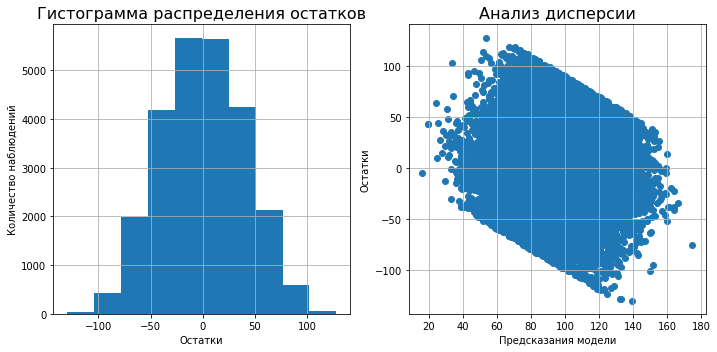

In [43]:
predictions_reg3 = pipe_final.predict(X_test_reg3.drop('id', axis=1))

# рассчет метрик
print('Основные метрики модели:')

r2_reg3 = r2_score(y_test_reg3, predictions_reg3)
print("R2 LinearRegression =", r2_reg3)

mse_reg3 = mean_squared_error(y_test_reg3, predictions_reg3)
print("MSE =", mse_reg3)

rmse_reg3 = mse_reg3 ** 0.5
print("RMSE =", rmse_reg3)

mae_reg3 = mean_absolute_error(y_test_reg3, predictions_reg3)
print("MAE =", mae_reg3)

# анализ остатков
analyze_residuals(y_test_reg3, predictions_reg3)
mean_product_reg3 = predictions_reg3.mean()

Судя по метрикам модель, обученная на данных третьего региона, получилась самая слабая: модель отрабатывает только около 20% всех наблюдений, при этом имеет в среднем отклонение около 33 от истинных значений. 

Остатки нормально распределны. Дисперсия также как и в первом регионе говорит о том, что модель не полностью улавливает все связи.

Создадим табличку со всеми метриками моделей и средним значением предсказанного таргета:

In [44]:
model_results = pd.DataFrame(
    {
       'name': ['region_1', 'region_2', 'region_3'],
        'r_2': [r2_reg1, r2_reg2, r2_reg3],
        'mse': [mse_reg1, mse_reg2, mse_reg3],
        'rmse': [rmse_reg1, rmse_reg2, rmse_reg3],
        'mae': [mae_reg1, mae_reg2, mae_reg3],
        'mean_prediction': [mean_product_reg1, mean_product_reg2, mean_product_reg3]
    }
)
model_results

,name,r_2,mse,rmse,mae,mean_prediction
0,region_1,0.274821,1420.878900,37.694547,31.008551,92.594320
1,region_2,0.999623,0.798872,0.893797,0.719900,69.029492
2,region_3,0.199394,1601.747261,40.021835,32.755053,94.956202


**Вывод:**

В данном разделе мы построили модель линейной регрессии для предсказания целевого количественного признака. При выборе модели с помощью метрики RMSE из всех рассматриваемых моделей: LinearReggression, Ridge, Lasso и способов нормализации входных признаков метрика практически не отличалась. Выбрали базовый вариант: LinearRegression и StandartScaler. 

Далее мы обучали модель и делали предсказания для каждого региона отдельно. В результате можно сказать, что данная модель практически идеально отрабатывает для второго региона: почти все наблюдения предсказаны верно, в остальных корень из средней квалратичной ошибки не превышает 0.9 тыс. баррелей. По итогам среднее значение запасов месторождения в регионе - 69 тыс. баррелей.

Однако модель не так успешно делает предсказания для оставшихся регионов. В первом регионе модель лишь в 27% предсказаний вернее определяет чем статистические величины и в случае ошибки в среднем отклоняется на 31 тыс. барелей. Среднее значение в местрождении равно 92.6 тыс. баррелей. 

В третьем регионе модель успешна лишь в 20% наблюдений со средней ошибкой 32.7 тыс. баррелей. Месторождение там содержит в среднем около 95 тыс. баррелей.

Несмотря на то, что среднее значение предсказаний второго региона ниже, но в первом и третьем регионе модель может сильно завысить или занизить прогнозное значение.

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Обучение и валидацию проводишь верно! Круто, что создаешь специальные функции для выполнения повторяющихся действий, это позволяет сделать код более аккуратным и эффективным. С этого момента бывают подводные камни. Мы получили валидационные подвыборки с помощью `train_test_split`, индексы при этом будут хаотичны в них (соответсвовать исходному датасету), а предсказания у нас упорядочены. За этим надо следить в данном проекте, чтобы потом правильно ставилось соответствие таргета и предсказания, именно для одной и той же скважины.

## Подготовка к расчёту прибыли

Вначале рассчитаем, сколько должно содержаться нефти в месторождении для безубыточной разработки. Запишем исходные данные:


In [45]:
# общий бюджет на регион
BUDGET = 10_000_000_000

# количество исследуемых точек
INVESTIGATED_POINTS = 500

# количество разрабатываемых месторождений в регионе
FIELD_NUM = 200

# расходы на разработку одного месторождения
expenses_per_field = BUDGET / FIELD_NUM

# доход с одной единицы product
INCOME_PER_FIELD = 450_000

# средний требуемый запас месторождения
mean_req_product = BUDGET / (INCOME_PER_FIELD * FIELD_NUM)
round(mean_req_product, 2)

111.11

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Здорово, что вводишь константы! Это позволяет избежать ошибок при редактировании проекта, то есть достаточно будет поменять значение только одной константы, чтобы поменялись все завиясящие от нее расчеты. К тому же код будет читать гораздо удобнее, так как мы будем понимать, что означает каждая из констант (по голому числу в коде сложно быстро догадаться, что оно значит).

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Согласно стандартам оформления <a href = 'https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29'>PEP-8</a> названия констант принято задавать заглавными буквами (например, BUDGET).

Из-за отсутсвия данных можем рассчитывать только валовую прибыль. Чтобы получить валовую прибыль неотрицательную, необходимо разрабатывать месторождения с запасами не менее 111.1 тыс. баррелей. Из средних показателей, предсказанных моделью, ни один регион не имеет таких средних значений. 

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Все верно! Во всех регионах средняя концентрация продукта слишком низкая, чтобы выбирать точки случайно, поэтому нужен хороший механизм для отбора.

Для того, чтобы иметь доступ к самим месторождениям(т.е. к *id*), истинным значениям и предсказанным, создадим таблицу, содержащие все эти данные: 

In [46]:
region_1_predicted = X_test_reg1.copy()
region_1_predicted['product_pred'] = predictions_reg1
region_1_predicted['product_true'] = y_test_reg1
region_1_predicted.head(2)

,id,f0,f1,f2,product_pred,product_true
72031,c5Qsm,0.344571,-0.272941,-2.099642,68.927415,170.053522
27978,894L2,1.652531,-0.206616,1.868818,99.176667,61.453092


In [47]:
region_2_predicted = X_test_reg2.copy()
region_2_predicted['product_pred'] = predictions_reg2
region_2_predicted['product_true'] = y_test_reg2
region_2_predicted.head(2)

,id,f0,f1,f2,product_pred,product_true
72031,Z5kmk,2.404544,1.392635,3.003099,82.215551,80.859783
27978,SQVIe,7.863461,-3.074607,4.994210,135.186645,134.766305


In [48]:
region_3_predicted = X_test_reg3.copy()
region_3_predicted['product_pred'] = predictions_reg3
region_3_predicted['product_true'] = y_test_reg3
region_3_predicted.head(2)

,id,f0,f1,f2,product_pred,product_true
72031,u8iV1,-0.370020,0.667530,-4.538057,54.556699,76.447828
27978,3v9dH,1.525227,-4.025469,1.634140,90.189453,60.054617


## Расчёт прибыли и рисков 

Для расчета реальной валовой прибыли напишем функцию:

In [49]:
def calculate_gross_profit(product_true, product_pred):
    """Функция на входе принимает реальные данные и предсказанные.
    На основании топ-200 предсказанных месторождений используем
    соответствующие им реальные значения, чтобы вычислить
    валовую прибыль. Фунцкия возвращает суммарную для всего
    региона прибыль.
    """
    
    top_200_fields = product_pred.sort_values(ascending=False)
    selected = product_true[top_200_fields.index][:FIELD_NUM]
    gross_profit = selected.sum() * INCOME_PER_FIELD - BUDGET

    return gross_profit

In [50]:
predicted_dfs = [region_1_predicted, region_2_predicted, region_3_predicted]

С помощью boostrap сформируем 1000 выборок для вычисления валовой прибыли для каждой из них. Чтобы потом получить среднее значение прибыли, доверительный интервал и оценку риска убытков для каждого региона.

In [51]:
list_of_profits = []

for num, df in enumerate(predicted_dfs):
    state = np.random.RandomState(17)

    product_true = df['product_true']
    product_pred = df['product_pred']

    profits = []
    for _ in range(1000):
        
        product_true_subsample = product_true.sample(INVESTIGATED_POINTS, replace=True, random_state=state)
        product_pred_subsample = product_pred[product_true_subsample.index]
        
        product_true_subsample.reset_index(drop = True, inplace=True)
        product_pred_subsample.reset_index(drop = True, inplace=True)
        
        profits.append(calculate_gross_profit(product_true_subsample, product_pred_subsample))
        
   
    
    profits = pd.Series(profits)
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    risk = (profits < 0).mean()
    mean = profits.mean()
    
    list_of_profits.append(profits)
    
    print('-' * 90)
    print('Показатели для Региона', num+1)
    print(f'Средняя валовая прибыль: {mean/1e6:.2f} млн. руб.')
    print(f'95%-доверительный интервал: от {lower / 1e6:.2f} млн. руб. до {upper / 1e6:.2f} млн. руб.')
    print(f'Риск убытков: {risk:.2%}')

------------------------------------------------------------------------------------------
Показатели для Региона 1
Средняя валовая прибыль: 439.19 млн. руб.
95%-доверительный интервал: от -105.10 млн. руб. до 928.96 млн. руб.
Риск убытков: 5.60%
------------------------------------------------------------------------------------------
Показатели для Региона 2
Средняя валовая прибыль: 477.19 млн. руб.
95%-доверительный интервал: от 52.49 млн. руб. до 869.39 млн. руб.
Риск убытков: 0.80%
------------------------------------------------------------------------------------------
Показатели для Региона 3
Средняя валовая прибыль: 370.99 млн. руб.
95%-доверительный интервал: от -132.89 млн. руб. до 847.35 млн. руб.
Риск убытков: 8.20%


Визуализируем полученнные распределения прибыли всех регионов на одном графике:

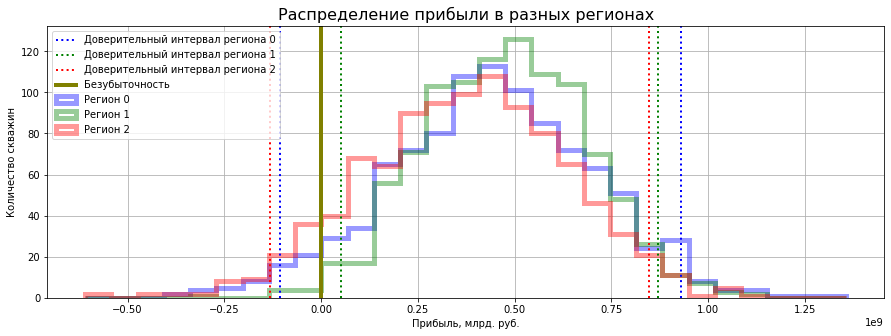

In [52]:
minimum = min(profit.min() for profit in list_of_profits)
maximum = max(profit.max() for profit in list_of_profits)
bins_num = 30

fig = plt.figure(figsize=(15, 5))
list_of_colors = ['blue', 'green', 'red']
for i, region_profit in enumerate(list_of_profits):
    
    region_profit.hist(histtype='step',
                       color=list_of_colors[i], 
                       linewidth=5, 
                       bins=np.linspace(minimum, maximum, bins_num),
                       alpha=0.4,
                       label=f'Регион {i}'
                      )
    
    plt.axvline(x=region_profit.quantile(0.025), 
                color=list_of_colors[i], linestyle=':', 
                linewidth=2, 
                label=f'Доверительный интервал региона {i}'
               )
    
    plt.axvline(x=region_profit.quantile(0.975), 
            color=list_of_colors[i], linestyle=':', 
            linewidth=2
           )
    
plt.axvline(x=0, color='olive', linestyle='-', linewidth=4, label='Безубыточность')
plt.xlabel('Прибыль, млрд. руб.')
plt.ylabel('Количество скважин')
plt.title('Распределение прибыли в разных регионах', fontsize=16)
plt.legend(loc=2)
plt.show()                 

Из все трех регионов единственным с положительным доверительным интервалом и риском убытков, меньшим 2.5% является второй. Несмотря на то, что это регион с наименьшими средними запасами, все же высокая успешность модели снижает риски ошибиться до приемлемых. Поэтому рекомендацию для разработки можно дать только для второго региона.

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 

<b>Все отлично! 👍:</b> Ты верно делаешь, что при семплировании данных устанавливаешь параметр **replace = True**. 

<details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

Особенностью техники бутстреп является семплирование с возвратом, то есть наблюдение в выборку может попасть несколько раз. Это необходимо для того, чтобы добиться независимости при каждом выборе, иначе вероятность достать элемент из выборки будет с каждым разом увеличиваться. Причем чем больше размер подвыборки, тем выраженнее будет зависимость. Для подвыборки размера 1, например, в крайнем случае, мы возрат можем не делать, так уж и быть, а вот для подвыборки размером с семплируемую, без возврата ну никак не получится получить разнообразные варианты, а подвыборку большего размера вообще — не получить.

Все это может показаться немного странным для понимания: как будто одна скважина может буриться несколько раз. Но давай вспомним, что выборка - это лишь некоторое представление о генеральной совокупности. Вполне возможно, что где-то в регионе существуют и другие потенциальные точки добычи, о которых мы даже не подозреваем, но они являются частью генеральной сововкупности. В таком случае повторяющиеся наблюдения можно рассматривать как разные точки добычи из всей генеральной совокупности, просто они имеют близкие характеристики. 

</details>

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера<a class="tocSkip"></h3>
 
<b>На доработку🤔:</b> Поскольку мы вынуждены формировать выборку с возвращением (**replace = True**), в сабсемпле у нас образуются повторения, причем дублироваться будут и индексы. Затем мы формируем на основе него второй сабсемпл, и в нем тоже будут дублироваться индексы. Но давай посмотрим, что происходит, когда мы пытаемся достать какие-то значения из вектора с дублирующимися индексами, побробуй выполнить следующий код:
    
```python
t_subsample = pd.Series([5, 5, 7, 7], index = [0, 0, 1, 1])
p_subsample = pd.Series([5.5, 5.5, 7.5, 7.5], index = [0, 0, 1, 1])
    
# Пробуем достать одно значение
print(t_subsample[0])
    
# Пробуем достать все значения по исходным индексам, ожидаем увидеть 4 значения, так как столько их было в исходной выборке
print()
print(t_subsample[p_subsample.index]) 
```  
    
Видим, что из-за дублирования количество отобранных значений разрастается. Это непременно будет приводить к завышению прибыли и занижению рисков. Чтобы избежать данной проблемы, нам нужно либо перед функцией прибыли сбросить у обоих сабсемплов индексы (чтобы каждое повторяющееся значения стало считаться уникальным за счет индекса, и при этом между векторами не нарушилась сопоставимость):
    
```python
# Cбрасываем индексы
t_subsample = t_subsample.reset_index(drop = True)
p_subsample = p_subsample.reset_index(drop = True)
    
# Пробуем достать значения снова
print(t_subsample[0])
print()
print(t_subsample[p_subsample.index])
```  

либо не сбрасывать индексы, но в функцию прибыли передавать полный валидационный вектор таргета, в котором индексы не дублируются и соотвествуют индексам предсказаний (обозначают одни и те же скважины), либо вовсе работать с датасетом: семплировать его, его же отправлять в прибыль, его сортировать, из него брать первые 200 строк таргета.

<div class="alert alert-info">
Спасибо большое за пояснение в этом моменте. Очень сильно дополнила момент из теории, теперь стало все понятно. Вообще не ожидал от индексов такого...😲

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b> 😉

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 

    
* Стоит уточнить единицы измерения, этот момент не всегда интуитивно понятен.
    
    
* Большие числа и числа с длинной дробной частью опять же воспринимаются не очень хорошо. Сумму, кажется, удобнее для восприятия выводить в миллионах (указывая единицу измерения), или использовать <a href = 'https://www.pythonmorsels.com/string-formatting/'>форматирование</a> выводимых чисел, чтобы задачть какой-то разделитель для лучшего восприятия разрядов. Дробную часть лучше округлять до нескольких знаков, можно с помощью того же форматирования.
    
    
* Еще кстати очень удобно можно визуализировать результаты: строить распределения прибыли и добавлять на них вертикальные линии - границы доверительного интервала и границу безубыточности. Также для всех можно задать единый размер оси Х и стандартизировать размер бинов, чтобы за счет одного только взягляда уже было понятно, какое из распределений смещено правее по оси Х и по каким бинам какая разница.

<div class="alert alert-info">
    
За эту поправку тоже спасибо! Такие мелочи, из которых складывается весь стиль и тон работы, такие моменты очень люблю. 
    
За cheat sheets по f-string тоже благодарю. Всегда приходиться лезть в записи за оформлением, т.к. из головы вечно вылетало. А здесь в такой структурированной подаче вроде даже запомнил и расширил круг инструментов.

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b> Класс!

## Общий вывод


Главной задачей проекта является определение региона, в котором можно вести разработку наиболее богатых нефтяных месторождений с риском получения убытка менее 2.5%. Для этого необходимо создать модель, которая на основании признаков, характеризующих месторождение и полученных в ходе геологоразведки, позволяет прогнозировать запасы в этом месторождении. Обладая информацией и потенциальных запасах не трудно оценить убыточность или, напротив, перспективность точки.

Для этого были исследованы данные трех разных регионов. Среди предоставленной информации выделили целевой признак запасов сырья в месторождении *product* и входные признаки, характеризующие качество нефти *f0, f1, f2*. Данные не содержали критических ошибок, лишь небольшое число строк имели одинаковые *id*, которые были просто переименованы. 

В ходе исследовательского анализа были выявлены отличия выборок регионов. Отличительной особенностью второго региона стала сильная кластеризация признака *f2* и линейно с ним связанного таргета. Такого не наблюдается в остальных регионах. Помимо этого не все данные распределны нормально, некоторые признаки имеют выбросы. Касательно связ между признаками, то с таргетом линейно связан только признак *f2*, остальные имеют другую связь. Высокая кластеризация, линейность связи все это отразилось в высокой корреляции между целевым признаком и *f2* (0.98) во втором регионе, подчеркивая его выраженные предикаторские свойства для модели.

Задача предсказания количественного признака это задача линейной регрессии. Поэтому среди моделей были рассмотрены LinearRegression, Ridge, Lasso модели. На основании перебора разных моделей и способов нормализации входных признаков было установлено, что максимальные показатели всех моделей практически идентичны. Не повлияли на результат и способы нормализации. В качестве модели была выбрана самая простая - LinearRegression с нормализацией StandartScaler. 

По результатам моделирования можно сказать, что данная модель практически идеально отрабатывает для второго региона: почти все наблюдения предсказаны верно, в остальных корень из средней квалратичной ошибки не превышает 0.9 тыс. баррелей. По итогам среднее значение запасов месторождения в регионе - 69 тыс. баррелей. Однако модель не так успешно делает предсказания для оставшихся регионов. В первом регионе модель лишь в 27% предсказаний вернее определяет чем статистические величины и в случае ошибки в среднем отклоняется на 31 тыс. барелей. Среднее значение в местрождении равно 92.6 тыс. баррелей. В третьем регионе модель успешна лишь в 20% наблюдений со средней ошибкой 32.7 тыс. баррелей. Месторождение там содержит в среднем около 95 тыс. баррелей.

Наконец, получив прогнозные данные, мы смогли рассчитать прибыль каждого месторождения, просуммировав это, получили информацию о целом рассматриваемом регионе. Согласно условиям сумма бюджета на разработку 200 месторождений равна 10 млрд. руб. С учетом прибыли с каждой тысячи баррелей добытой нефти 450 тыс. руб неубыточное месторождение должно содержать от 111.1 тыс. баррелей сырья. Это значение превышает средние значения по региону, как реальные так и прогнозные. Отклоняясь от среднего значения нормального распределения понижается вероятность по его достижения, а значит риск получить значение ниже целевого будет выше. 

Выделив 200 наиболее богатых месторождений согласно полученному прогнозу, просуммировали реальные значения, чтобы оценить валовую прибыль предсказанных точек. Для оценки использовали 95% доверительный интервал, который позволит нам с 95% уверенностью сказать, что в среднем месторождение не будет убыточным. Единственным регионом с положительным интервалом стал второй, риск понести убытки в котором составляет 0.6%. Остальные регионы имеют неприемлемый риск выше 2.5%. Поэтому финальной рекомендацией является, что разработку месторождений целесообразно вести на основании полученных данных только во втором регионе. 

Также стоит рассмотреть особенность добытой информации о признаке *f2* второго региона, который стал определяющим в предсказании запасов нефти. Возможно добавление новых признаков месторождений позволят построить более точную модель для первого и третьего регионов. Потому что потенциал по запасам они имеют больший, главным минусом является плохая отработка модели на данных этих регионов.

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 

<b>Все отлично! 👍:</b> Выводы - огонь!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Максим, спасибо за твой проект! Мне безумно понравилась твоя работа! В тебе виден будущий профессионал своего дела :) 
    
Кратко пройдусь по впечатлениям. 

**Отмечу отдельные положительные моменты проекта🙂**:
 
* Прекрасное владение инструментами обработки данных!
* Умелое проведение машинного обучения!
* Потрясающие навыки использования функций и циклов для повышения эффективности работы!
* Дополнение своими идеями - очень круто!
* Все этапы работы проделаны очень осмысленно! Каждый шаг снабжен пояснениями и выводами!
* Работа имеет четкую структуру и выполнена аккуратно, проверять - одно удовольствие!

    
**На что стоит обратить внимание🤓**:
   
* При подсчете прибыли помним про индексы: важно, чтобы они не дублировались.
    
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b> Проект полностью готов, ты мастерски с ним справился! Было очень приятно с тобой поработать :) Желаю огромных успехов в дальнейшем обучении и карьерных достижений! 🍀